In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
## Set hyper-parameters
## These values have been chosen based on my best results, considering the limitations of the cuda memory. 
seed_val = 67
Max_Len = 300
batch_size = 10
epochs = 4
lr = 1e-5
eps = 1e-6

In [4]:
## Read "TrainData.csv" from the respective folder on your Google Drive"
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/colllabb/train.csv')
df

,Id,Title,Body,Tags,CreationDate,Y
0,34552656,Java: Repeat Task Every Random Seconds,<p>I'm already familiar with repeating tasks e...,<java><repeat>,2016-01-01 00:21:59,LQ_CLOSE
1,34553034,Why are Java Optionals immutable?,<p>I'd like to understand why Java 8 Optionals...,<java><optional>,2016-01-01 02:03:20,HQ
2,34553174,Text Overlay Image with Darkened Opacity React...,<p>I am attempting to overlay a title over an ...,<javascript><image><overlay><react-native><opa...,2016-01-01 02:48:24,HQ
3,34553318,Why ternary operator in swift is so picky?,"<p>The question is very simple, but I just cou...",<swift><operators><whitespace><ternary-operato...,2016-01-01 03:30:17,HQ
4,34553755,hide/show fab with scale animation,<p>I'm using custom floatingactionmenu. I need...,<android><material-design><floating-action-but...,2016-01-01 05:21:48,HQ
...,...,...,...,...,...,...
44995,60461435,Convert List<String> to string C# - asp.net - ...,<p>I am new to this and I am asking for help t...,<c#><asp.net><sql-server>,2020-02-29 02:22:18,LQ_CLOSE
44996,60461754,Does Python execute code from the top or botto...,<p>I am working on learning Python and was won...,<python>,2020-02-29 03:33:59,LQ_CLOSE
44997,60462001,how to change payment date in Azure?,<p>It looks like it costs 8 days per month in ...,<azure><billing>,2020-02-29 04:34:16,LQ_CLOSE
44998,60465318,how to implement fill in the blank in Swift,"<p>""I _____ any questions.""</p>\n\n<p>I want t...",<ios><swift>,2020-02-29 12:50:43,LQ_CLOSE


In [5]:
## Read "TestData.csv" from the respective folder on your Google Drive"
df2 = pd.read_csv("/content/drive/MyDrive/colllabb/test_d.csv", error_bad_lines=False)
df2

<ipython-input-5-6bb80a01321e>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df2 = pd.read_csv("/content/drive/MyDrive/colllabb/test_d.csv", error_bad_lines=False)


,Id,Title,Body,Tags,CreationDate,Y
0,34552974,How to get all the child records from differen...,I am having 4 different tables like \r\nselect...,<sql><sql-server>,2016-01-01 01:44:52,LQ_EDIT
1,34554721,Retrieve all except some data of the another t...,I have two table m_master and tbl_appointment\...,<php><mysql><sql><codeigniter><mysqli>,2016-01-01 08:43:50,LQ_EDIT
2,34555135,Pandas: read_html,<p>I'm trying to extract US states from wiki U...,<python><pandas>,2016-01-01 09:55:22,HQ
3,34555448,Reader Always gimme NULL,"I'm so new to C#, I wanna make an application ...",<sql-server><c#-4.0>,2016-01-01 10:43:45,LQ_EDIT
4,34555752,php rearrange array elements based on condition,basically i have this array:\r\n\r\n array(...,<php>,2016-01-01 11:34:09,LQ_EDIT
...,...,...,...,...,...,...
14995,60465681,How can I align two flex boxes to follow each ...,"<p>I have a menu, and I'd like the div.right-c...",<html><css><flexbox>,2020-02-29 13:32:56,LQ_CLOSE
14996,60467932,C++ The correct way to multiply an integer and...,<p>I try to multiply an integer by a double bu...,<c++>,2020-02-29 17:46:41,LQ_CLOSE
14997,60468378,WHY DJANGO IS SHOWING ME THIS ERROR WHEN I TRY...,*URLS.PY*\r\n //URLS.PY FILE\r\n fro...,<django><django-views><django-templates>,2020-02-29 18:35:39,LQ_EDIT
14998,60469392,PHP - getting the content of php page,<p>I have a controller inside which a server i...,<javascript><php><html>,2020-02-29 20:32:14,LQ_CLOSE


# Data Pre-processing

In [6]:
## TrainData
## concatenation of 'Title', 'Body', 'Tags','CreationDate' columns and removing other columns except for "Y" column

df['text'] = df['Title'] + ' ' + df['Body'] + ' ' + df['Tags'] + ' ' + df['CreationDate']
df = df.drop(['Id', 'Title', 'Body', 'Tags', 'CreationDate'], axis=1)



In [7]:
category_mapping = {'HQ': 0, 'LQ_EDIT': 1, 'LQ_CLOSE': 2}
df['Y'] = df['Y'].map(category_mapping)


In [8]:
df = df[['text', 'Y']]

In [9]:
df

,text,Y
0,Java: Repeat Task Every Random Seconds <p>I'm ...,2
1,Why are Java Optionals immutable? <p>I'd like ...,0
2,Text Overlay Image with Darkened Opacity React...,0
3,Why ternary operator in swift is so picky? <p>...,0
4,hide/show fab with scale animation <p>I'm usin...,0
...,...,...
44995,Convert List<String> to string C# - asp.net - ...,2
44996,Does Python execute code from the top or botto...,2
44997,how to change payment date in Azure? <p>It loo...,2
44998,how to implement fill in the blank in Swift <p...,2


In [10]:
## TestData
## concatenation of 'Title', 'Body', 'Tags','CreationDate' columns and removing other columns except for "Y" column

df2['text'] = df2['Title'] + ' ' + df2['Body'] + ' ' + df2['Tags'] + ' ' + df2['CreationDate']
df2 = df2.drop(['Id', 'Title', 'Body', 'Tags', 'CreationDate'], axis=1)



In [11]:
category_mapping = {'HQ': 0, 'LQ_EDIT': 1, 'LQ_CLOSE': 2}
df2['Y'] = df2['Y'].map(category_mapping)

In [12]:
df = df[['text', 'Y']]

In [13]:
df2


,Y,text
0,1,How to get all the child records from differen...
1,1,Retrieve all except some data of the another t...
2,0,Pandas: read_html <p>I'm trying to extract US ...
3,1,"Reader Always gimme NULL I'm so new to C#, I w..."
4,1,php rearrange array elements based on conditio...
...,...,...
14995,2,How can I align two flex boxes to follow each ...
14996,2,C++ The correct way to multiply an integer and...
14997,1,WHY DJANGO IS SHOWING ME THIS ERROR WHEN I TRY...
14998,2,PHP - getting the content of php page <p>I hav...


In [14]:
## A function to remove punctuations and other symbols
import string

punct =[]
punct += list(string.punctuation)
punct += '’'
punct.remove("'")
def remove_punctuations(text):
    for punctuation in punct:
        text = text.replace(punctuation, ' ')
    return text
print(punct)

['!', '"', '#', '$', '%', '&', '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~', '’']


In [15]:
## Remove punctuations from "text" data column of TrainData

df['text'] = df['text'].apply(remove_punctuations)
df['text'] = df['text'].apply(lambda x: str(x).replace("  ", " "))
df.to_csv('TrainData_removed_punctuations.csv')

## Looking at an example
df['text'].iloc[0]

"Java Repeat Task Every Random Seconds p I'm already familiar with repeating tasks every n seconds by using Java util Timer and Java util TimerTask But lets say I want to print Hello World to the console every random seconds from 1 5 Unfortunately I'm in a bit of a rush and don't have any code to show so far Any help would be apriciated   p \n java repeat 2016 01 01 00 21 59"

#Model

In [16]:
import numpy as np
import pandas as pd
import torch
from google.colab import output

## install the transformers package from Hugging Face
!pip install transformers
output.clear() 


In [17]:
# Set the device to use (GPU if available, otherwise CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(torch.cuda.get_device_name)

<function get_device_name at 0x7fcfd51d77f0>


To fine-tune the pre-trained RoBERTa model for solving this text classification problem, we need to split each text into the tokens and for this, we have to use the tokenizer provided by the model. The tokenizer of the model splits the texts into tokens and then adds the special [CLS] and [SEP] tokens. In the end, it maps the tokens to their index in the tokenizer vocabulary.

In [18]:
## Tokenize the texts and map them to their index

from transformers import RobertaTokenizer
tokenizer = RobertaTokenizer.from_pretrained('roberta-large')

texts = df.text.values
labels = df.Y.values

input_ids = []
for text in texts:
    encoded_text = tokenizer.encode(text, add_special_tokens = True,)
    input_ids.append(encoded_text)

## looking at an example
print('text:', texts[3])
print('Tokenized text:', tokenizer.tokenize(texts[3]))
print('input IDs:', input_ids[3])

Token indices sequence length is longer than the specified maximum sequence length for this model (1521 > 512). Running this sequence through the model will result in indexing errors


text: Why ternary operator in swift is so picky  p The question is very simple but I just could not find the answer  p 

 p Why doesn't p 

 pre code return x  0    Hello 
 code  pre 

 p compile but p 

 pre code return x  0     Hello 
 code  pre 

 p does  p 

 p This is really weird because all the other operators don't need an extra white space e g  p 

 pre code let x  1 1
let y  1  1
 code  pre 

 p are the same  p 

 p I think it has something to do with optionals But when you use a code  code operator on a variable it must be used like this  p 

 pre code let s String  nil
let x  s startIndex
 code  pre 

 p I mean it must follow another operator right  p 
 swift operators whitespace ternary operator optional 2016 01 01 03 30 17
Tokenized text: ['Why', 'Ġter', 'n', 'ary', 'Ġoperator', 'Ġin', 'Ġswift', 'Ġis', 'Ġso', 'Ġpick', 'y', 'Ġ', 'Ġp', 'ĠThe', 'Ġquestion', 'Ġis', 'Ġvery', 'Ġsimple', 'Ġbut', 'ĠI', 'Ġjust', 'Ġcould', 'Ġnot', 'Ġfind', 'Ġthe', 'Ġanswer', 'Ġ', 'Ġp', 'Ġ', 'ĊĊ', '

<Axes: >

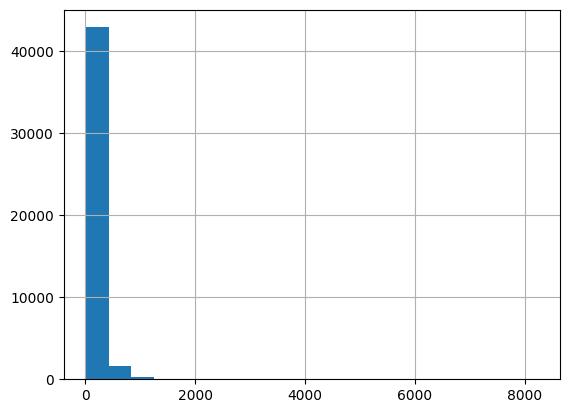

In [19]:
## Get length of all texts in TrainData

seq_len = [len(i.split()) for i in df['text']]
pd.Series(seq_len).hist(bins = 20)

In [20]:
## padding/truncating
from tensorflow.keras.preprocessing.sequence import pad_sequences
Max_Len = Max_Len
print('\nPadding/truncating all texts to %d values...' % Max_Len)
input_ids = pad_sequences(input_ids, maxlen=Max_Len, dtype="long", value=0, truncating="post", padding="post")
# "post" indicates that the padding and truncation is being done at the end of the sequence not the begining


Padding/truncating all texts to 300 values...


In [21]:
## Create attention masks

## The “Attention Mask” is an array of 1s and 0s indicating which tokens are padding and which are actual words
attention_masks = []
for sent in input_ids:
    att_mask = [int(token_id > 0) for token_id in sent]
    attention_masks.append(att_mask)

In [22]:
## splitting: Use 80% for training and 20% for validation
from sklearn.model_selection import train_test_split
train_inputs, valid_inputs, train_labels, valid_labels = train_test_split(input_ids, labels,random_state=seed_val, test_size=0.2)
train_masks, valid_masks, _, _ = train_test_split(attention_masks, labels, random_state=seed_val, test_size=0.2)

In [23]:

## Convert the ndarrays into torch tensors, i.e. the format that is acceptable to the model
train_inputs = torch.tensor(train_inputs)
valid_inputs = torch.tensor(valid_inputs)
train_labels = torch.tensor(train_labels)
valid_labels = torch.tensor(valid_labels)
train_masks = torch.tensor(train_masks)
valid_masks = torch.tensor(valid_masks)




In [24]:
## Create the DataLoaders
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
batch_size = batch_size      

train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

valid_data = TensorDataset(valid_inputs, valid_masks, valid_labels)
valid_sampler = SequentialSampler(valid_data)
valid_dataloader = DataLoader(valid_data, sampler=valid_sampler, batch_size=batch_size)
     

In [25]:
## Load RobertaForSequenceClassification
# This is the RoBERTa model with an added single linear layer on top for classification task

import random
import gc
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
gc.collect()
torch.cuda.empty_cache()

from transformers import RobertaForSequenceClassification, RobertaConfig
model = RobertaForSequenceClassification.from_pretrained("roberta-large",num_labels = 3, output_attentions = False, output_hidden_states = False,)
model.to(device)
output.clear()

In [26]:
## optimizer
from transformers import AdamW, get_linear_schedule_with_warmup
optimizer = AdamW(model.parameters(), lr = lr, eps = eps) 
epochs = epochs
## Total number of training steps is number of batches * number of epochs.
total_steps = len(train_dataloader) * epochs
## Create the learning rate scheduler
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps = 0, num_training_steps = total_steps)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:407: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [27]:
## Function to calculate the accuracy 
def accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
## Training

os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
gc.collect()
torch.cuda.empty_cache()

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)


loss_values = []
for epoch_i in range(0, epochs):
    print('Epoch {:} / {:}'.format(epoch_i + 1, epochs))
    total_loss = 0
    model.train()
    for step, batch in enumerate(train_dataloader):
        if step % 100 == 0 and not step == 0:
            print('  Batch {:>5,}  of  {:>5,}  Loss: {}'.format( step, len(train_dataloader), loss))
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        model.zero_grad()        
        outputs = model(b_input_ids, 
                    token_type_ids=None, 
                    attention_mask=b_input_mask, 
                    labels=b_labels)
        loss = outputs[0]
        total_loss += loss.item()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)   # This could prevent the "exploding gradients" problem
        optimizer.step()
        scheduler.step()  # Updates the learning rate
    avg_train_loss = total_loss / len(train_dataloader)            
    loss_values.append(avg_train_loss)
    print("  Average training loss: {0:.2f}".format(avg_train_loss))

## Evaluation on the Validation set
    print("Running Validation...")
    model.eval()
    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0
    for batch in valid_dataloader:
        batch = tuple(t.to(device) for t in batch)
        b_input_ids, b_input_mask, b_labels = batch
        with torch.no_grad():        
            outputs = model(b_input_ids, 
                            token_type_ids=None, 
                            attention_mask=b_input_mask)
        logits = outputs[0]
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        tmp_eval_accuracy = accuracy(logits, label_ids)
        eval_accuracy += tmp_eval_accuracy
        nb_eval_steps += 1
    print(" Validation Accuracy: {0:.4f}".format(eval_accuracy/nb_eval_steps))

Epoch 1 / 4
  Batch   100  of  3,600  Loss: 0.40576013922691345
  Batch   200  of  3,600  Loss: 0.5152202248573303
  Batch   300  of  3,600  Loss: 0.3257746696472168
  Batch   400  of  3,600  Loss: 0.21419337391853333
  Batch   500  of  3,600  Loss: 0.4291723668575287
  Batch   600  of  3,600  Loss: 0.7866207361221313
  Batch   700  of  3,600  Loss: 0.09069058299064636
  Batch   800  of  3,600  Loss: 0.03792636841535568
  Batch   900  of  3,600  Loss: 0.23484554886817932
  Batch 1,000  of  3,600  Loss: 0.5683103799819946
  Batch 1,100  of  3,600  Loss: 0.13213883340358734
  Batch 1,200  of  3,600  Loss: 0.2463637888431549
  Batch 1,300  of  3,600  Loss: 0.21042439341545105
  Batch 1,400  of  3,600  Loss: 0.005736359395086765
  Batch 1,500  of  3,600  Loss: 0.7368437051773071
  Batch 1,600  of  3,600  Loss: 0.008034722879529
  Batch 1,700  of  3,600  Loss: 0.22409982979297638
  Batch 1,800  of  3,600  Loss: 0.9872128367424011
  Batch 1,900  of  3,600  Loss: 0.6495607495307922
  Batch 2,